## Python Trading Strategy using Fibonacci and RSI for Amazon (Impressive results!)

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Create a function to calculate the RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [3]:
# Calculating the fibonacci levels
def calculate_fibonacci_levels(data):
    max_price = data['Close'].max()
    min_price = data['Close'].min()
    diff = max_price - min_price
    levels = {
        '0.0%': max_price,
        '23.6%': max_price - diff * 0.236,
        '38.2%': max_price - diff * 0.382,
        '50.0%': max_price - diff * 0.500,
        '61.8%': max_price - diff * 0.618,
        '78.6%': max_price - diff * 0.786,
        '100.0%': min_price
    }
    return levels

In [5]:
# Create a function to get the upper level and lower level of the close price
def get_fibonacci_levels(close_price, fibonacci_levels):
    upper_level = min([level for level in fibonacci_levels.values() if level >= close_price], default = None)
    lower_level = max([level for level in fibonacci_levels.values() if level <= close_price], default = None)
    return upper_level, lower_level

In [19]:
# Download the data
data = yf.download("AMZN", start="2014-12-16", end="2024-12-12")
data.columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000
2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000
2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000
2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000
2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000
...,...,...,...,...,...,...
2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200
2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100
2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400


In [20]:
# Calculate the RSI 
data['RSI'] = calculate_rsi(data)

# Calculate the fibonacci levels
fibonacci_levels = calculate_fibonacci_levels(data)

In [21]:
# Show the data with the new RSI column
data

,Adj Close,Close,High,Low,Open,Volume,RSI
Date,,,,,,,
2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000,NaN
2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000,NaN
2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000,NaN
2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000,NaN
2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000,NaN
...,...,...,...,...,...,...,...
2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200,59.477540
2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100,76.858771
2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400,76.808086


In [22]:
# Create a function to generate trading signals (aka buy and sell signals)
def generate_signals(data, fibonacci_levels):
    buy_signals = []
    sell_signals = []
    position = False

    # Loop through the dataset
    for i in range(0, len(data)):
        # Get the previous fibonacci levels
        previous_upper_level, previous_lower_level = get_fibonacci_levels(data['Close'].iloc[i-1], fibonacci_levels)

        # Ensure previous levels are not None
        if previous_upper_level is None and previous_lower_level is None or i==0:
            buy_signals.append(np.nan),
            sell_signals.append(np.nan)
            continue

        # Implement the strategy and generate the buy and sell signals 
        if data['RSI'].iloc[i] < 50 and data['Close'].iloc[i] <= previous_lower_level and not position and i >= 1:
            buy_signals.append(data['Close'].iloc[i])
            sell_signals.append(np.nan)
            position=True
        elif data['RSI'].iloc[i] > 70 and data['Close'].iloc[i] >= previous_upper_level and position and i >= 1:
            buy_signals.append(np.nan)
            sell_signals.append(data['Close'].iloc[i])
            position = False
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
            
    return buy_signals, sell_signals

In [24]:
# Generate the trading signals 
data['Buy_Signal'], data['Sell_Signal'] = generate_signals(data, fibonacci_levels)

In [25]:
data

,Adj Close,Close,High,Low,Open,Volume,RSI,Buy_Signal,Sell_Signal
Date,,,,,,,,,
2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000,NaN,NaN,NaN
2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000,NaN,NaN,NaN
2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000,NaN,NaN,NaN
2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000,NaN,NaN,NaN
2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200,59.477540,NaN,NaN
2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100,76.858771,NaN,NaN
2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400,76.808086,NaN,NaN


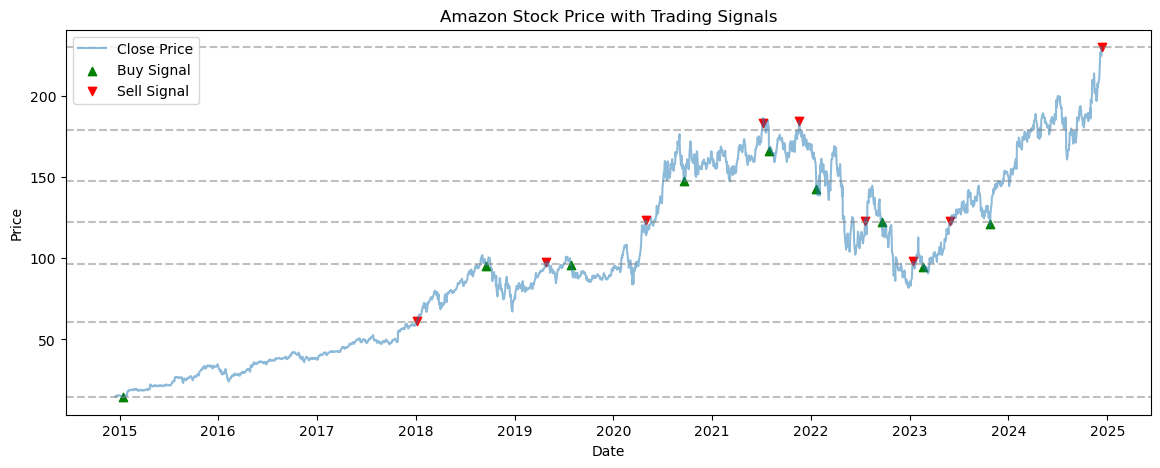

In [27]:
# Plot the stock price and signals
plt.figure(figsize=(14,5))
plt.plot(data['Close'], label="Close Price", alpha=0.5)
plt.scatter(data.index, data['Buy_Signal'], label="Buy Signal", marker="^", color='green')
plt.scatter(data.index, data['Sell_Signal'], label="Sell Signal", marker="v", color='red')
# Add fibonacci retracement levels to the plot
for level in fibonacci_levels.values():
    plt.axhline(y=level, color='gray', linestyle='--', alpha=0.5)
# Give the plot a title, labels and a legend
plt.title('Amazon Stock Price with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
# Create a function to calculate the strategy return
def calculate_strategy_returns(data):
    buy_prices = data['Buy_Signal'].dropna().values
    sell_prices = data['Sell_Signal'].dropna().values
    returns = 0
    i = 0
    for buy, sell in zip(buy_prices, sell_prices):
        print(i, ')', sell, '-', buy, '=', sell-buy)
        returns += sell - buy
        i = i + 1
    return returns

In [29]:
# Print the trading strategy returns 
strat_returns = calculate_strategy_returns(data)
print("The strategy returns is:", strat_returns)
print()
# Print the buy and hold strategy
buy_hold_return = data['Close'].iloc[-1] - data['Close'].iloc[0]
print("The buy and hold strategy returns is: ", buy_hold_return)
print()

0 ) 61.457000732421875 - 14.34749984741211 = 47.109500885009766
1 ) 97.53150177001953 - 95.40149688720703 = 2.1300048828125
2 ) 123.69999694824219 - 95.62249755859375 = 28.077499389648438
3 ) 183.78700256347656 - 147.74549865722656 = 36.04150390625
4 ) 184.80299377441406 - 166.37950134277344 = 18.423492431640625
5 ) 122.7699966430664 - 142.64300537109375 = -19.873008728027344
6 ) 98.12000274658203 - 122.19000244140625 = -24.06999969482422
7 ) 122.7699966430664 - 94.58000183105469 = 28.18999481201172
8 ) 230.25999450683594 - 121.38999938964844 = 108.8699951171875
The strategy returns is: 224.89898300170898

The buy and hold strategy returns is:  215.50699424743652



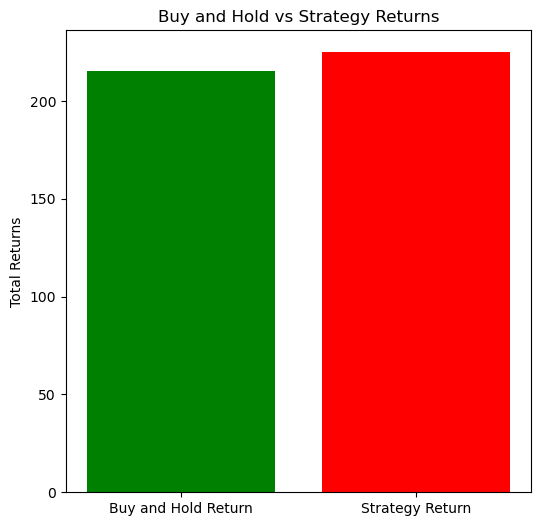

In [32]:
# Plot the returns 
plt.figure(figsize=(6,6))
plt.bar(["Buy and Hold Return", "Strategy Return"], [buy_hold_return, strat_returns], color=['green', 'red'])
plt.title("Buy and Hold vs Strategy Returns")
plt.ylabel("Total Returns")
plt.show()